# CHATGPT Generated Steps

1. Data Collection
Source: Obtain a labeled dataset containing spam and ham emails or messages. A common dataset for this purpose is the SpamAssassin public corpus.
2. Data Preprocessing
Cleaning: Remove unnecessary characters, punctuation, and HTML tags.
Normalization: Convert all text to lowercase to ensure uniformity.
Tokenization: Split the text into individual words or tokens.
Stop Words Removal: Remove common stop words (e.g., "and", "the") that do not contribute to the classification.
Stemming/Lemmatization: Reduce words to their base or root form.
3. Feature Extraction
Bag of Words (BoW): Convert text into a fixed-length vector by counting the frequency of each word.
TF-IDF (Term Frequency-Inverse Document Frequency): Weight the importance of words based on their frequency in a document relative to their frequency in the entire corpus.
Word Embeddings: Use pre-trained word vectors like Word2Vec or GloVe to represent words in a continuous vector space.
4. Model Selection
Choose a machine learning algorithm suitable for text classification, such as:
Naive Bayes
Logistic Regression
Support Vector Machines (SVM)
Random Forest
Deep Learning models (e.g., LSTM, BERT)
5. Model Training
Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
Train the chosen model on the training set.
6. Model Evaluation
Evaluate the model on the testing set using appropriate metrics such as:
Accuracy
Precision
Recall
F1 Score
Use a confusion matrix to understand the model’s performance in more detail.
7. Model Tuning
Perform hyperparameter tuning to improve model performance. Techniques include grid search and random search.
8. Model Deployment
Once the model is trained and evaluated, it can be deployed into a production environment for real-time spam detection.

# LOADING THE DATA

The SpamAssassin public corpus is divided into several parts:

20021010_easy_ham.tar.bz2: Contains easy ham emails that are typically not mistaken for spam.  
20021010_hard_ham.tar.bz2: Contains hard ham emails that might be mistaken for spam.  
20021010_spam.tar.bz2: Contains spam emails collected from spam traps.  
20030228_spam.tar.bz2: Another set of spam emails collected later.  
20030228_easy_ham.tar.bz2: Another set of easy ham emails.  
20030228_easy_ham_2.tar.bz2: An additional set of easy ham emails.  
20030228_hard_ham.tar.bz2: An additional set of hard ham emails.  

But this task is too hard so ill just use a kaggle dataset


In [2]:
import pandas as pd

In [3]:
dataset_path = 'spam.csv'
# Load the dataset
df = pd.read_csv(dataset_path)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

Let's solve the encoding problem using chatgpt's code

In [6]:
import chardet
# Detect encoding
with open(dataset_path, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# Read the file with detected encoding
df = pd.read_csv(dataset_path, encoding=encoding)

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
df['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [11]:
df['Unnamed: 3'].unique()

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

After looking at the csv in excel, i feel we need to combine all columns after v2
maybe due to some inputting error, some inputs are in multiple cells

Or nah, that is too much work, ill assume those columns are unnecessary and remove them

In [12]:
df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1, inplace=True)

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA & DATA VISUALIZATION

I just did what the Kaggle guy did

In [14]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
messages = df
messages['length'] = messages['v2'].apply(len)
messages.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
messages['v2'].value_counts().rename_axis(['v2']).reset_index(name='counts').head()

,v2,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,7 wonders in My WORLD 7th You 6th Ur style 5th...,4
4,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",4


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

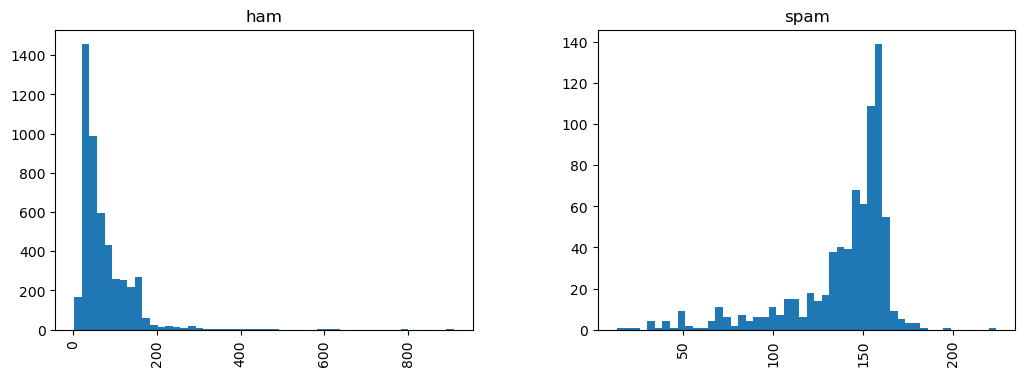

In [17]:
messages.hist(column='length', by='v1', bins=50,figsize=(12,4))

Seems like Spam emails are longer, useful information

# DATA PREPROCESSING AND CLEANING

First define X and Y

In [22]:
X = df['v2']
Y = df['v1'].map({'ham': 0, 'spam': 1})

In [23]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [24]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

Lowercasing, tokenization, removing stop words, stemming

In [43]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\durga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\durga\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [50]:
def TextPreprocess(X):
    
    #Tokenization & lowering
    X = [word_tokenize(doc.lower()) for doc in X]
    
    #Stop word Removal
    stop_words = set(stopwords.words("english"))
    newX = []
    for doc in X:
        newX.append([word for word in doc if word not in stop_words])
    X = newX
    
    #Stemming
    stemmer = PorterStemmer()
    newX = []
    for doc in X:
        newX.append([stemmer.stem(word) for word in doc])
    X = newX
    
    return X

In [51]:
tokens = TextPreprocess(X)

In [52]:
tokens

[['go',
  'jurong',
  'point',
  ',',
  'crazi',
  '..',
  'avail',
  'bugi',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  '...',
  'cine',
  'got',
  'amor',
  'wat',
  '...'],
 ['ok', 'lar', '...', 'joke', 'wif', 'u', 'oni', '...'],
 ['free',
  'entri',
  '2',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  '21st',
  'may',
  '2005.',
  'text',
  'fa',
  '87121',
  'receiv',
  'entri',
  'question',
  '(',
  'std',
  'txt',
  'rate',
  ')',
  '&',
  'c',
  "'s",
  'appli',
  '08452810075over18',
  "'s"],
 ['u', 'dun', 'say', 'earli', 'hor', '...', 'u', 'c', 'alreadi', 'say', '...'],
 ['nah', "n't", 'think', 'goe', 'usf', ',', 'live', 'around', 'though'],
 ['freemsg',
  'hey',
  'darl',
  "'s",
  '3',
  'week',
  "'s",
  'word',
  'back',
  '!',
  "'d",
  'like',
  'fun',
  'still',
  '?',
  'tb',
  'ok',
  '!',
  'xxx',
  'std',
  'chg',
  'send',
  ',',
  'å£1.50',
  'rcv'],
 ['even',
  'brother',
  'like',
  'speak',
  '.',
  'treat',
  'like',
  'a

# VECTORIZATION

I'll use Word2vce for vectorization

In [54]:
from gensim.models import Word2Vec

I'll use google's pretrained Word2Vec

In [58]:
import gensim.downloader as api

# Download the model from gensim's model zoo
wv = api.load('word2vec-google-news-300')